In [1]:
import sys 
from SF_functions import *
from Header_Binnings import *
from params import *
import numpy as np 
import glob
from astropy.table import Table
# Enter path of object of interest, can also be specified as input



#original=sys.argv[1]

In [2]:
objects_path = '/mnt/c/Users/20xha/Documents/Caltech/Research/superfit/spectra_nonan/'
objects_list = glob.glob(objects_path+'*.ascii') 

In [3]:
sample = Table.read("/mnt/c/Users/20xha/Documents/Caltech/Research/superfit/ML_sample.ascii", format = "ascii")
sample.rename_column('col1', 'ZTF_Name')
sample.rename_column('col2', "Class")
sample.rename_column('col3', "redshift")
sample.rename_column('col8', "Version")

0 / 8959
Redshift: [0.02185  0.022425 0.023    0.023575 0.02415 ]
Running optimization for spectrum file: ZTF18aabssth_20180309_P60_v1_10A with resolution = 10 Ang
Failed. Retrying with resolution = 20 Ang
Optimization started


/home/hallflower/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1266: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.
/mnt/c/Users/20xha/Documents/Caltech/Research/superfit/superfit/SF_functions.py:384: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(prob)


Optimization finished within  41.78s 


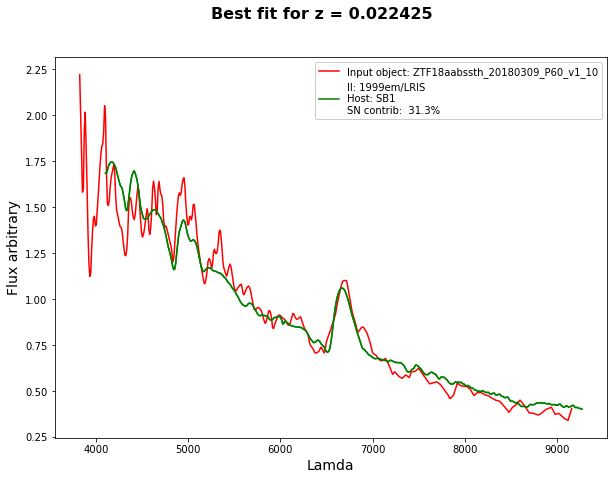

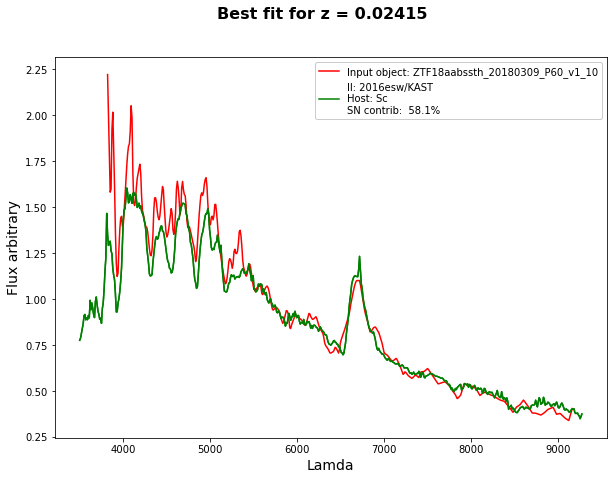

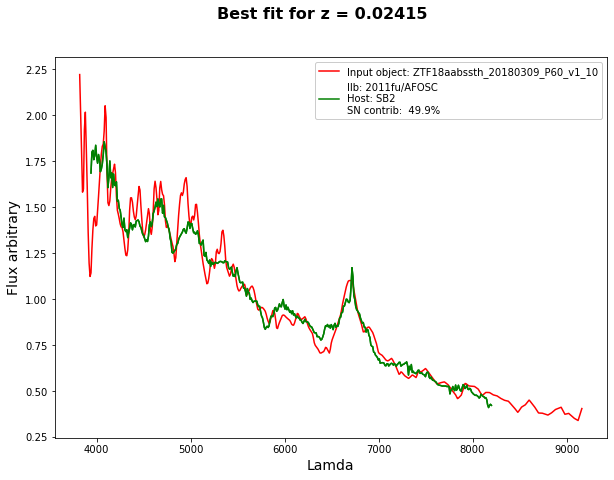

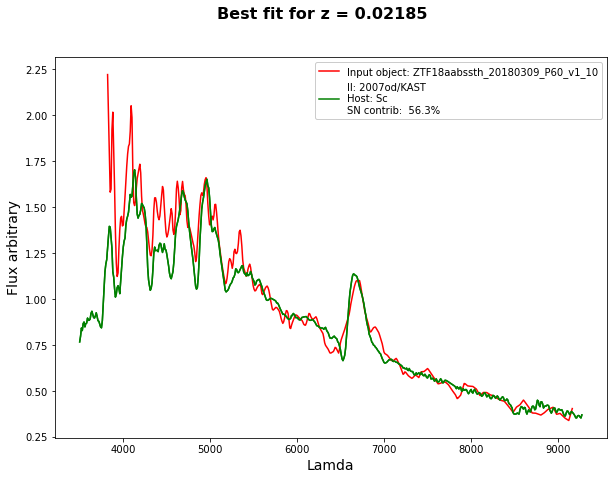

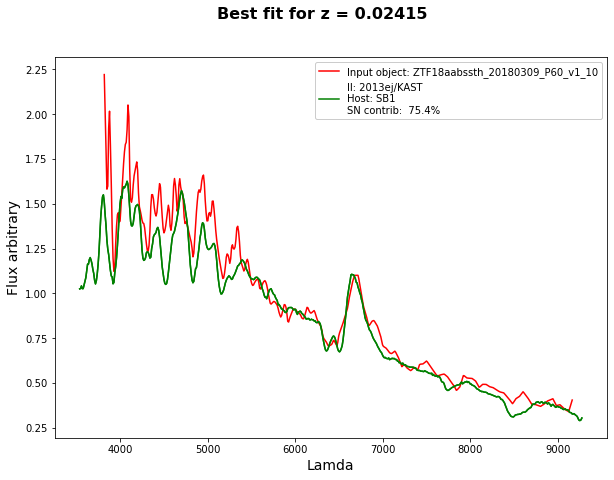

In [6]:
counter = 0
for row in sample:
    if (counter % 250 == 0):
        print("{} / {}".format(counter, len(sample)))
    counter += 1
    
    filename = row["Version"]
    original = objects_path + filename
    if(original in objects_list):
        n = 5
        resolution = data['resolution']
        upper      = data['upper']
        lower      = data['lower']
        
        maxmin_lambda = Table.read(original, format = "ascii")["col1"]
        min_lambda = min(maxmin_lambda)
        max_lambda = max(maxmin_lambda)
        
        if(upper < max_lambda):
            upper = max_lambda + 100
        if(lower > min_lambda):
            lower = min_lambda - 100

        interval   = int((upper - lower)/resolution)
        lam        =     np.linspace(lower, upper, interval)
        
        redshift_0 = redshifts_all.iloc[np.where(redshifts_all["ZTFID"] == row["ZTF_Name"])[0]]["redshift"].values[0]
        redshift_1 = row["redshift"]
        if(redshift_0 != '-'):
            redshift_0 = float(redshift_0)
            redshift = np.linspace(redshift_0 - 0.05 * redshift_0, redshift_0 + 0.05 * redshift_0, 5)
        elif(not(np.isnan(redshift_1))):
            redshift = np.linspace(redshift_1 - 0.05 * redshift_1, redshift_1 + 0.05 * redshift_1, 5)
        print("Redshift: {}".format(redshift))
        try:
            resolution=10
            binned_name= obj_name_int(original, lam, resolution)[3]
            print('Running optimization for spectrum file: {0} with resolution = {1} Ang'.format(binned_name,resolution))
            #Obtaining the binned file name (obj to be analyzed)
            save_bin = save_bin_path + binned_name
            #Calling the original file, getting rid of the header and binning it (default set to 20A)
            kill_header_and_bin(original,resolution, save_bin = save_bin)
            #Core superfit function on the binned file, default to plot and save n fits
            all_parameter_space(redshift,extconstant,templates_sn_trunc,templates_gal_trunc, 
            lam, resolution, n=n, plot=plotting, kind=kind, original=save_bin, save=save_results_path, show=show)
        except:
            try:
                resolution=20
                print('Failed. Retrying with resolution = {0} Ang'.format(resolution))

                #Obtaining the binned file name (obj to be analyzed)
                save_bin = save_bin_path + binned_name
                #Calling the original file, getting rid of the header and binning it (default set to 20A)
                kill_header_and_bin(original,resolution, save_bin = save_bin)
                #Core superfit function on the binned file, default to plot and save n fits
                all_parameter_space(redshift,extconstant,templates_sn_trunc,templates_gal_trunc, 
                lam, resolution, n=n, plot=plotting, kind=kind, original=save_bin, save=save_results_path, show=show)
            except:
                resolution=30
                print('Failed. Retrying with resolution = {0} Ang'.format(resolution))

                #Obtaining the binned file name (obj to be analyzed)
                try:
                    save_bin = save_bin_path + binned_name
                except: 
                    import ipdb; ipdb.set_trace()
                #Calling the original file, getting rid of the header and binning it (default set to 20A)
                kill_header_and_bin(original,resolution, save_bin = save_bin)
                #Core superfit function on the binned file, default to plot and save n fits
                all_parameter_space(redshift,extconstant,templates_sn_trunc,templates_gal_trunc, 
                lam, resolution, n=n, plot=plotting, kind=kind, original=save_bin, save=save_results_path, show=show)
        break